In [1]:
# 순회 문제에서의 유전알고리즘 해결

In [1]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# # 값 설정하기 (test)
# dataNum = 10
# data = np.random.rand(2,dataNum)
# print(data)

# print(data[0]) #xdata
# print(data[1]) #ydata

[[ 0.71584669  0.26535372  0.34511439  0.09468069  0.9966939   0.76459031
   0.60905271  0.20847491  0.02837971  0.81421162]
 [ 0.30723334  0.43158214  0.15136854  0.79311057  0.08640863  0.84432344
   0.34345276  0.83023394  0.11760499  0.37570532]]
[ 0.71584669  0.26535372  0.34511439  0.09468069  0.9966939   0.76459031
  0.60905271  0.20847491  0.02837971  0.81421162]
[ 0.30723334  0.43158214  0.15136854  0.79311057  0.08640863  0.84432344
  0.34345276  0.83023394  0.11760499  0.37570532]


In [75]:
import matplotlib.pyplot as plt
import numpy as np
import math

# circuit 오직 순회만
class Genetic:    
    
    # 유전자 갯수와 유전 인자수 세팅
    def __init__(self,dataNum,geneticNum):
        self.dataNum = dataNum
        self.geneticNum = geneticNum
        self.data = np.random.rand(2,dataNum) * 10
    # 초기 유전자 설정
    def firstGenetic(self):
        # 유전자 수
        self.genetic = np.zeros((self.geneticNum,self.dataNum))
        for i in range(self.geneticNum):
            self.genetic[i] = np.arange(self.dataNum)
            np.random.shuffle(self.genetic[i])
    
    
    ########################################################
    # 시각화 구현
    ########################################################
    
    # 모델과 모델사이 선긋기
    def line(self,n1,n2):
        plt.plot([self.data[0][n1],self.data[0][n2]],[self.data[1][n1],self.data[1][n2]])

    # 생성순서로 유전자 출력
    def order_model(self):
        plt.scatter(self.data[0],self.data[1])
        for i in range(self.dataNum-1):
            self.line(i, i+1)
        self.line(0, self.dataNum-1)
        self.pltShowProp()
        
    # 지정한 유전자 출력
    def model(self,n):
        plt.scatter(self.data[0],self.data[1])
        for i in range(self.dataNum-1):
            self.line(int(self.genetic[n][i]), int(self.genetic[n][i+1]))
        self.line(int(self.genetic[n][0]), int(self.genetic[n][self.dataNum-1]))
        self.pltShowProp()
        
    def pltShowProp(self):
        plt.axis([0, 10, 0, 10])
        plt.show()
    
    
    ########################################################
    # 내부 함수
    ########################################################  
    
    # 적합도 평가 함수
    def tolerance(self, n):
        return 100 - self.active(n)
        
    # 거리 구하기
    def active(self,n):
        _sum = 0
        for i in range(self.dataNum-1):
#             x, y  self.data[0][self.genetic[n][i]] , self.data[1][self.genetic[n][i]]
            _sum += math.sqrt(math.pow(self.data[0][int(self.genetic[n][i+1])] - self.data[0][int(self.genetic[n][i])],2) + 
                      math.pow(self.data[1][int(self.genetic[n][i+1])] - self.data[1][int(self.genetic[n][i])],2))
#             print(math.sqrt(math.pow(self.data[0][int(self.genetic[n][i+1])] - self.data[0][int(self.genetic[n][i])],2) + 
#                       math.pow(self.data[1][int(self.genetic[n][i+1])] - self.data[1][int(self.genetic[n][i])],2)))
        return _sum
    
    
    ########################################################
    # 선택 함수
    ########################################################
    
    def roulette(self):
        _sum = 0
        for i in range(self.geneticNum):
            _sum += self.active(i)
#         print(sum)
        rtmp = np.random.rand()
        stmp = 0
        for i in range(self.geneticNum):
            stmp += self.active(i)
            print(stmp/_sum,rtmp)
            if stmp/_sum >= rtmp :
                return i

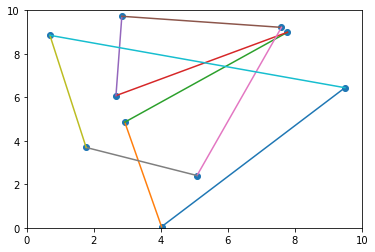

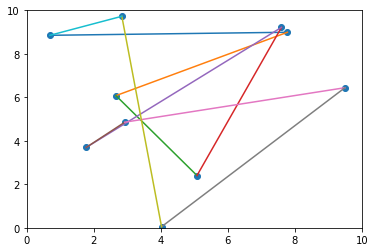

거리 : 59.26241556050441
적합도 : 40.73758443949559


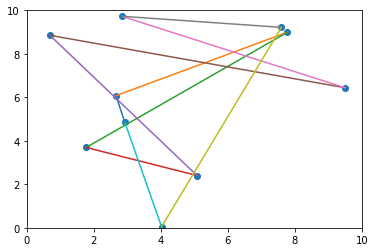

거리 : 57.717192340896325
적합도 : 42.282807659103675
0.2579364621847649 0.02855066751972113
0


In [77]:
g = Genetic(dataNum=10, geneticNum=4)
g.firstGenetic() # 초기유전자 설정
g.order_model() # 생성순서 테스트 출력

# g.active(0)  #거리
g.model(0)
print("거리 :", g.active(0))
print("적합도 :", g.tolerance(0))

# g.active(1)  #거리
g.model(1)
print("거리 :", g.active(1))
print("적합도 :", g.tolerance(1))

print(g.roulette())

#print(g.data)
#print(g.genetic)

In [56]:
n = np.random.rand()
print(n)

0.8976682434574452


In [12]:
# # 모델과 모델사이 선긋기 (test)
# def line(n1,n2):
#     plt.scatter(data[0],data[1])
#     plt.plot([data[0][n1],data[0][n2]],[data[1][n1],data[1][n2]])
    
# # 순차 유전자 출력
# def order_model():
#     for i in range(dataNum-1):
#         line(i, i+1)
#     line(0, dataNum-1)

# # 유전자 수
# geneticNum = 20

# genetic = np.zeros((geneticNum,dataNum))
# for i in range(geneticNum):
#     genetic[i] = np.arange(dataNum)
#     np.random.shuffle(genetic[i])
# print(genetic)



    
#plt.show()

NameError: name 'dataNum' is not defined